### How quantum algorithms are constructed?
In this section, we will discuss how a quantum computer works. We will focus on a general understanding of the principles of its work. A quantum computer works with qubits, initialized in state 0 (we will describe qubits in more detail later). In subsequent stages, quantum systems are implemented on them. The computer initiates qubits, applies quantum gates, and the system itself evolves in a unitary way (it is reversible). The result obtained is a set of 0 and 1, which are the values of the measured qubits.

### Circuits
The fundamental element of quantum computing is the quantum circuit. A quantum circuit is a computational routine consisting of coherent quantum operations on quantum data, such as qubits. It is an ordered sequence of quantum gates, measurements and resets, which may be conditioned on real-time classical computation. Any quantum program can be represented by a sequence of quantum circuits and classical near-time computation. In Qiskit, this core element is represented by the QuantumCircuit class.

First, all qiskit libraries must be imported (* = all).

In [1]:
from qiskit import *

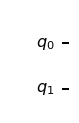

In [2]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2)
%matplotlib inline
circuit.draw('mpl')

As we can see, we created circuit with 2 qubits.

### Quantum Gates
Quantum gates are building blocks of quantum algorithms. They can act on single or many qubits. It is worth paying attention to the fact that for most algorithms single-qubit gates and one type of two-qubit gate called CNOT are enough. Basic one-qubit gates and CNOT gate are presented below.

Then we add 2 qubit registers to our system.

In [3]:
qr = QuantumRegister(2)

The next step is to create a quantum circuit.

In [4]:
circuit = QuantumCircuit(qr)

With this simple command we can visualize our system.

In [5]:
circuit.draw()

q0_0: 
      
q0_1:

### Hadamard Gate
The Hadamard gate operates on a single qubit. It places the given qubit in a superposition so that the measurement will have an equal probability of becoming 0 or 1.

Putting a gate on a qubit in Qiskit is very simple, in the command below we put a Hadamard's gate on the first qubit.

In [6]:
circuit.h(qr[0])

In [7]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────

Using the 'matplotlib' library we can generate a drawing of our circuit.

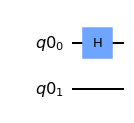

In [8]:
%matplotlib inline
circuit.draw(output="mpl")

### X Gate
The Pauli-X gate operates on a single qubit. It is a quantum equivalent of the NOT gate for classical computers, which, in a nutshell, is based on inverting the value of a given qubit (e.g. from 0 to 1).

In [9]:
circuit.x(qr[1])

In [10]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      ├───┤
q0_1: ┤ X ├
      └───┘

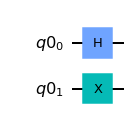

In [11]:
circuit.draw(output="mpl")

### CNOT Gate
Controlled gates act on 2 or more qubits, where one or more qubits act as a control for some operation. For example, the controlled-NOT gate (CNOT or CX) acts on 2 qubits and performs the NOT operation on the second qubit only when the first qubit is 1, otherwise leaves it unchanged.

In the case of a two qubit gate, the value of the control qubit should be given at the beginning.

In [12]:
circuit.cx(qr[1], qr[0])

In [13]:
circuit.draw()

┌───┐┌───┐
q0_0: ┤ H ├┤ X ├
      ├───┤└─┬─┘
q0_1: ┤ X ├──■──
      └───┘

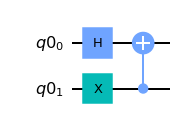

In [14]:
circuit.draw(output="mpl")

### Backends
Backends represent either a simulator or a real quantum computer, and are responsible for running quantum circuits and returning results. They take in a ```qobj``` as input, which is a quantum object and the result of the compilation process, and they return a ```BaseJob``` object. This object allows asynchronous running of jobs for retrieving results from a backend when the job is completed. Each backend class can also include backend-specific functionality. For example, since the IBM Q backends are accessed through the cloud, they provide several methods for retrieving job instances between login sessions — for instance, when the queue for the devices is longer than one wants to keep a Python session running.

Below we can see listed local simulators and next real, quantum devices intended to run designed algorithms.

In [15]:
from qiskit import Aer
for backend in Aer.backends():
    print(backend.name())

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In order for us to be able to use IBM computers, we must authenticate our devices with a special token, which is available on the [IBM Quantum Experience](https://quantum-computing.ibm.com/) website. For this purpose, we recommend using the [official Qiskit guide](https://www.youtube.com/watch?v=M4EkW4VwhcI) (second half of the video).

In [17]:
from qiskit import IBMQ
provider = IBMQ.load_account()
provider.backends()

ibmqfactory.load_account:WARNING:2020-11-18 13:41:04,100: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]